In [182]:
# checking various properties of the catalogue for thesis

import astropy.io.fits as fits
import numpy as np
import pandas
from astropy.table import unique,Table,setdiff,hstack,join
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import seaborn as sns
warnings.filterwarnings("ignore")

#galaxies = Table.read('/suphys/fscu5535/python_scripts/raw_data/G3CGalv10.fits',memmap=True)
# groups = Table.read('/suphys/fscu5535/python_scripts/raw_data/G3CFoFGroupv10.fits',memmap=True)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12.5)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
# see what fraction of galaxies are grouped

grouped = 0

for i in galaxies:
    if i['GroupID'] != 0:
        grouped += 1
        
print(grouped)
print("fraction of galaxies in groups: ",grouped/len(galaxies))

83093
fraction of galaxies in groups:  0.407099113223262


In [6]:
# compare different stellar mass estimates
centrals = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits',memmap=True)
massesGKV = Table.read('/suphys/fscu5535/python_scripts/raw_data/StellarMassesGKVv24.fits',memmap=True)
massesLAM = Table.read('/suphys/fscu5535/python_scripts/raw_data/StellarMassesLambdarv24.fits',memmap=True)
massesPAN = Table.read('/suphys/fscu5535/python_scripts/raw_data/StellarMassesPanChromv24.fits',memmap=True)
centrals.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [5]:
# analyse missing halo mass data
Nfof = []
halomass = []
count = 0
for i in range(len(groups)):
    if groups['MassA'][i] < 100:
        Nfof.append(groups['Nfof'][i])
        halomass.append(groups['MassA'][i])
        
print(len(halomass))
        

2227


(array([2056.,    0.,    0.,    0.,  140.,    0.,    0.,    0.,   26.,
           0.,    0.,    0.,    5.]),
 array([2.        , 2.23076923, 2.46153846, 2.69230769, 2.92307692,
        3.15384615, 3.38461538, 3.61538462, 3.84615385, 4.07692308,
        4.30769231, 4.53846154, 4.76923077, 5.        ]),
 <BarContainer object of 13 artists>)

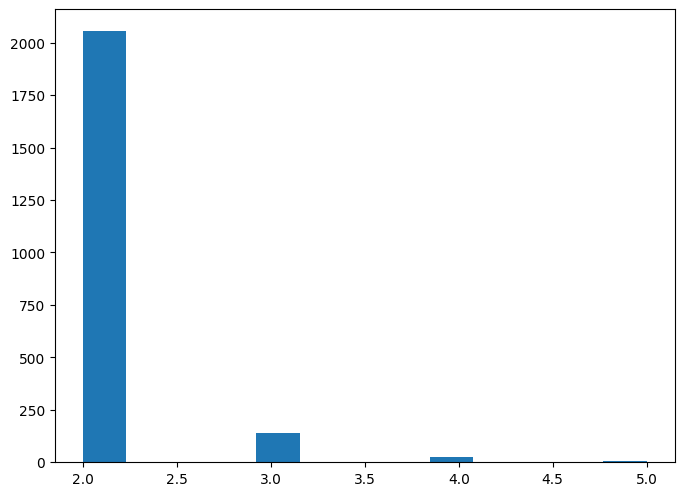

In [6]:
# hist
plt.figure(figsize=(8,6),dpi=100)
plt.hist(Nfof,bins='auto')

In [7]:
# of the groups with a missing halo mass, these are the fractions for each multiplicity. i.e. 92% of groups
# with missing halos mass had n == 2.
two = 0
three = 0
four = 0
five = 0
for i in Nfof:
    if i == 2:
        two += 1
    elif i == 3:
        three += 1
    elif i == 4:
        four += 1
    elif i == 5:
        five += 1

print(two/len(Nfof))
print(three/len(Nfof))
print(four/len(Nfof))
print(five/len(Nfof))
    

0.9232150875617423
0.06286484059272564
0.011674898967220475
0.00224517287831163


In [2]:
# read in my data
mydata = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.2.fits',memmap=True)
# massesLAM.info()
# massesPAN.info()

In [7]:
massesLAM.rename_column('logmstar','logmstar_Lam')

In [8]:
massesPAN.rename_column('logmstar','logmstar_Pan')

In [11]:
# extract relevant columns
massesLAMrel = hstack([massesLAM['CATAID'],massesLAM['logmstar_Lam']])
massesPANrel = hstack([massesPAN['CATAID'],massesPAN['logmstar_Pan']])
galaxiesrel = hstack([galaxies['CATAID']])

In [12]:
# left join mass data to galaxies g3cgalv10
massescombined = join(galaxiesrel,massesLAMrel,keys='CATAID',join_type='left')
massescombined = join(massescombined,massesPANrel,keys='CATAID',join_type='left')


In [29]:
massescombined.info()

<Table length=204110>
    name      dtype     unit   n_bad
------------ ------- --------- -----
      CATAID   int32               0
logmstar_Lam float32 dex(Msun) 20137
logmstar_Pan float32 dex(Msun) 20029


In [13]:
# read in gama3 table
gama3 = Table.read('/suphys/fscu5535/python_scripts/raw_data/gkvGamaIIMatchesv01.fits',memmap=True)
gama3.info()

<Table length=2193160>
   name     dtype  unit    class    
---------- ------- ---- ------------
    CATAID   int32      MaskedColumn
        RA float64  deg       Column
       DEC float64  deg       Column
    uberID   int64      MaskedColumn
     segID   int32      MaskedColumn
    nmatch   int32      MaskedColumn
uberID_all bytes63            Column


In [14]:
# extract relevant columns
gama3rel = hstack([gama3['CATAID'],gama3['uberID']])
massesGKVrel = hstack([massesGKV['uberID'],massesGKV['logmstar']])
massesGKVrel.rename_column('logmstar','logmstar_GKV')

In [15]:
# left join the above
gama3massesGKV = join(gama3rel,massesGKVrel,keys='uberID',join_type='left')

In [16]:
# now left join to masses combined
massescombined = join(massescombined,gama3massesGKV,keys='CATAID',join_type='left')

In [60]:
massescombined.info()

<Table length=204110>
    name      dtype     unit   n_bad
------------ ------- --------- -----
      CATAID   int32               0
logmstar_Lam float32 dex(Msun) 20137
logmstar_Pan float32 dex(Msun) 20029
      uberID   int64           20029
logmstar_GKV float32 dex(Msun) 20120


Text(0, 0.5, 'N')

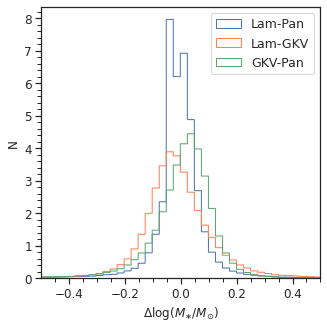

In [189]:
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
lampansub = np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_Pan'])
lamgkvsub = np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_GKV'])
gkvpansub = np.subtract(massescombined['logmstar_GKV'],massescombined['logmstar_Pan'])
bins=np.histogram(np.hstack((lampansub,lamgkvsub,gkvpansub)), bins=1000)[1]
ax.hist(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_Pan']),bins,color='b',fill=False,histtype='step',density=True)
ax.hist(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_GKV']),bins,color='coral',fill=False,histtype='step',density=True)
ax.hist(np.subtract(massescombined['logmstar_GKV'],massescombined['logmstar_Pan']),bins,color='g',fill=False,histtype='step',density=True)
ax.set_xlabel(r"$\Delta$log$(M_{\ast}/M_{\odot})$")
ax.set_xlim(-0.5,0.5)
plt.minorticks_on()
plt.legend(['Lam-Pan','Lam-GKV','GKV-Pan'])
ax.set_ylabel("N")

# #save the plot
# filename = "/suphys/fscu5535/python_scripts/figures/comparinggamamassdata.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)


In [192]:
print(np.std(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_Pan'])))
print(np.std(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_GKV'])))
print(np.std(np.subtract(massescombined['logmstar_GKV'],massescombined['logmstar_Pan'])))

print(np.median(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_Pan'])))
print(np.median(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_GKV'])))
print(np.median(np.subtract(massescombined['logmstar_GKV'],massescombined['logmstar_Pan'])))

0.47827917466904757
0.32387174651937484
0.5567997694572736
-0.0065135955810546875
-0.0332942008972168
0.030629634857177734


In [67]:
print(np.subtract(massescombined['logmstar_Lam'],massescombined['logmstar_Pan'])[0])

-0.03804493


In [68]:
print(massescombined[0])

CATAID logmstar_Lam logmstar_Pan      uberID     logmstar_GKV
        dex(Msun)    dex(Msun)                    dex(Msun)  
------ ------------ ------------ --------------- ------------
  6802     8.965768     9.003813 174000613108541     9.115373


In [69]:
# now left join massescombined with gamaINsami
gamaINsami = join(gamaINsami,massescombined,keys='CATAID',join_type='left')

In [70]:
gamaINsami.info()

<Table length=2147>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
       CATAID   int32           MaskedColumn     0
           RA float64       deg       Column     0
          Dec float64       deg       Column     0
            Z float32                 Column     0
       Rpetro float32       mag       Column     0
 DM_100_25_75 float32       mag       Column     0
  SURVEY_CODE   int16           MaskedColumn     0
       SigErr float32    km / s       Column     0
      GroupID   int32           MaskedColumn     0
  RankIterCen   int16           MaskedColumn     0
   SepIterCen float32    arcsec       Column     0
 CoSepIterCen float32   Mpc / h       Column     0
AngSepIterCen float32   Mpc / h       Column     0
      RankBCG   int16           MaskedColumn     0
       SepBCG float32    arcsec       Column     0
     CoSepBCG float32   Mpc / h       Column     0
    AngSepBCG float32   Mpc / h       Column     0
      RankC

In [89]:
# do some checks
for i in range(len(gamaINsami)):
    if gamaINsami['logmstar_Pan'][i] < 1 or gamaINsami['logmstar_Lam'][i] < 1 or gamaINsami['logmstar_GKV'][i] < 1:
        print(i)

872
873


In [90]:
print(gamaINsami[0:50])

CATAID      RA         Dec     ... logmstar_Pan      uberID     logmstar_GKV
           deg         deg     ...  dex(Msun)                    dex(Msun)  
------ ------------ ---------- ... ------------ --------------- ------------
  6821 174.15315328 0.81543855 ...    7.3118334 174000456909545     7.856572
  6837 174.30278702 0.78999299 ...      9.82991 174000298009275     9.773041
  7139 175.82830466 0.74788117 ...    10.858629 176000801808828    10.443039
  7206 176.16409281  0.7495694 ...    10.410899 176000445208845    10.500005
  7289 176.77502491 0.63568906 ...    11.081309 177000858407636    11.103938
  7715 179.22873399 0.72391972 ...    10.942653 179000376608573    11.044978
   ...          ...        ... ...          ...             ...          ...
 16022 217.45754642 0.66485519 ...    10.428088 218001195507946    10.270715
 16026 217.53450615 0.70349884 ...    10.165949 217000051908356    10.309827
 16242 218.13435093 0.77151448 ...    10.446109 218000476809079    10.352216

In [97]:
# checking some stuff for sami reduction section
cubeobs = Table.read('/suphys/fscu5535/python_scripts/raw_data/CubeObs.fits')
jesse = Table.read('/suphys/fscu5535/python_scripts/raw_data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20220604_private.fits')
stelkin = Table.read('/suphys/fscu5535/python_scripts/raw_data/samiDR3Stelkin.fits')
sam = Table.read('/suphys/fscu5535/python_scripts/raw_data/SAMI_1Re_stellarpops_combined_SamVaughan_13Aug2021.csv')

In [98]:
cubeobs.info()
jesse.info()
stelkin.info()
sam.info()

<Table length=3712>
    name     dtype   unit 
----------- ------- ------
  CUBEIDPUB bytes16       
     CUBEID bytes80       
   CUBENAME bytes80       
      CATID   int64       
   CUBEFWHM float32 arcsec
   CUBETEXP float32      s
  MEANTRANS float32       
     ISBEST    bool       
  CATSOURCE   int16       
   WARNSTAR   int16       
   WARNFILL   int16       
      WARNZ   int16       
   WARNMULT   int16       
   WARNAKPC   int16       
    WARNARE   int16       
   WARNAMGE   int16       
   WARNSK2M   int16       
   WARNSK4M   int16       
WARNSK4MHSN   int16       
   WARNFCAL   int16       
   WARNFCBR   int16       
   WARNSKYB   int16       
   WARNSKYR   int16       
   WARNSKER   int16       
    WARNWCS   int16       
     WARNRE   int16       
   WARNSKEM   int16       
   WARNEMFT   int16       
<Table length=3430>
      name       dtype     class     n_bad
--------------- ------- ------------ -----
          CATID   int64       Column     0
      CATID_EXT   int

In [100]:
count = 0
for i in range(len(cubeobs)):
    if cubeobs['ISBEST'][i] == True:
        count += 1
        
print(count)

3245


In [103]:
ellip = Table.read('/suphys/fscu5535/python_scripts/raw_data/InputCatGAMADR3.fits')
ellip.info()

<Table length=5536>
     name      dtype       unit        class     n_bad
------------- ------- ------------- ------------ -----
        CATID   int64                     Column     0
       RA_OBJ float64           deg       Column     0
      DEC_OBJ float64           deg       Column     0
       RA_IFU float64           deg       Column     0
      DEC_IFU float64           deg       Column     0
      r_petro float32           mag       Column     0
       r_auto float32           mag       Column     0
      z_tonry float32                     Column     0
       z_spec float32                     Column     0
          M_r float32           mag MaskedColumn   130
          r_e float32        arcsec MaskedColumn   101
mu_within_1re float32 mag / arcsec2 MaskedColumn   101
       mu_1re float32 mag / arcsec2 MaskedColumn   101
       mu_2re float32 mag / arcsec2 MaskedColumn   110
        ellip float32               MaskedColumn   101
           PA float32           deg MaskedCol

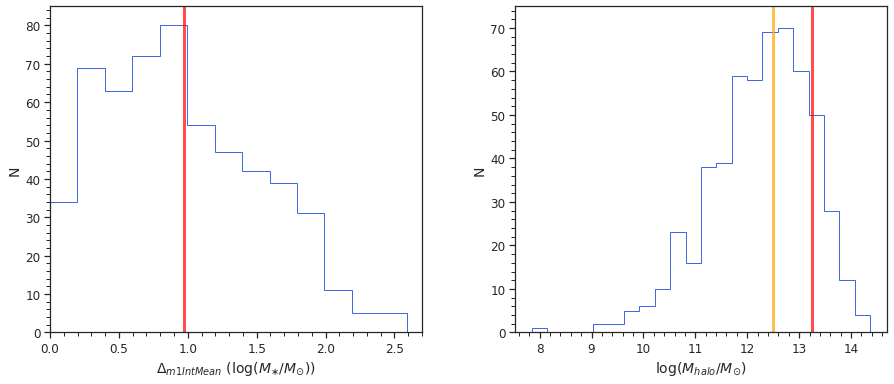

In [178]:
# generate histogram of mass gaps
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace' : 0.25}, figsize=(15,6))
ax1.hist(centrals['m1-IntMean'],bins='auto',fill=False,histtype='step',color='royalblue')
ax1.plot([0.97,0.97], [0,85],color='red',alpha=0.7,linewidth=3)
ax1.set_xlim(0,2.7)
ax1.set_ylim([0,85])
ax1.set_ylabel("N")
ax1.minorticks_on()
ax1.set_xlabel(r"$\Delta_{m1IntMean}$ (log$(M_{\ast}/M_{\odot})$)")

# # save the plot
# filename = "/suphys/fscu5535/python_scripts/figures/MassGapDist.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

# generate histogram of halo masses
ax2.hist(centrals['log(MassA)'],bins='auto',fill=False,histtype='step',color='royalblue')
ax2.plot([13.25,13.25], [0,75],color='red',alpha=0.7,linewidth=3)
ax2.plot([12.5,12.5],[0,75], color = 'orange', alpha = 0.7,linewidth=3)
ax2.set_ylim(0,75)
ax2.minorticks_on()
ax2.set_ylabel("N")
ax2.set_xlabel(r"log$(M_{halo}/M_{\odot})$")

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/massgaphalomassdists.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [110]:
mggs = 0
for i in range(len(centrals)):
    if centrals['m1-IntMean'][i] > 0.97:
        mggs += 1
        
print("Fraction of MGG's:",mggs/len(centrals))

Fraction of MGG's: 0.44021739130434784


In [119]:
print(len(centrals))
print(mggs)

552
243


In [120]:
masslum = Table.read('/suphys/fscu5535/python_scripts/mod_data/efedsGamamatches500arcs0.02z.fits')
masslum.info()

<Table length=152>
   name     dtype 
---------- -------
    gamaRA float64
   gamaDec float64
     gamaZ float32
   GroupID   int32
     MassA float32
      Nfof   int16
      Rgap float32
   efedsRA float64
  efedsDec float64
    efedsZ float64
Lbol500kpc float64
   L500kpc float64
   efedsID bytes22
     M_500 float64


Text(0.5, 0, 'Halo mass (dex(MSun/h))')

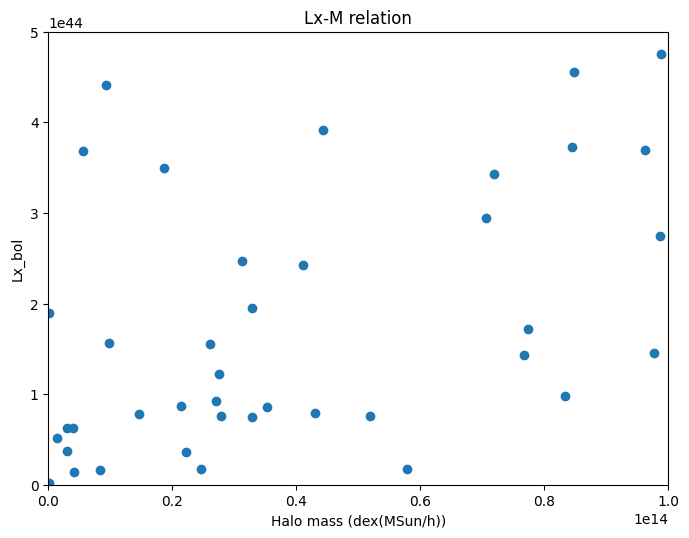

In [126]:
plt.figure(figsize=(8, 6), dpi=100)
masslumplot = plt.scatter(masslum['MassA'],masslum['Lbol500kpc'])
plt.xlim([0,1e14])
plt.ylim([0,0.5e45])
plt.title("Lx-M relation")
plt.ylabel("Lx_bol")
plt.xlabel("Halo mass (dex(MSun/h))")

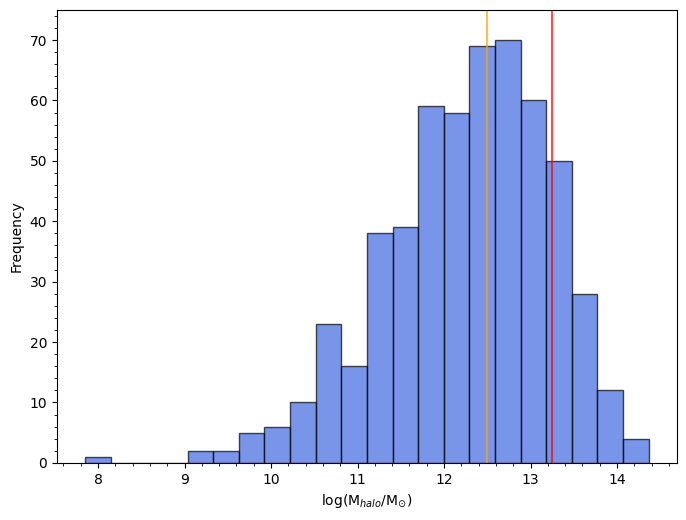

In [26]:
# generate histogram of halo masses
plt.figure(figsize=(8, 6), dpi=100)
halomasshist = plt.hist(centrals['log(MassA)'],bins='auto',edgecolor='k',alpha=0.7,color='royalblue')
plt.plot([13.25,13.25], [0,75],color='red',alpha=0.7)
plt.plot([12.5,12.5],[0,75], color = 'orange', alpha = 0.7)
plt.ylim(0,75)
plt.minorticks_on()
plt.ylabel("Frequency")
plt.xlabel(r"log(M$_{halo}$/M$_{\odot}$)")

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/halomassdist.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

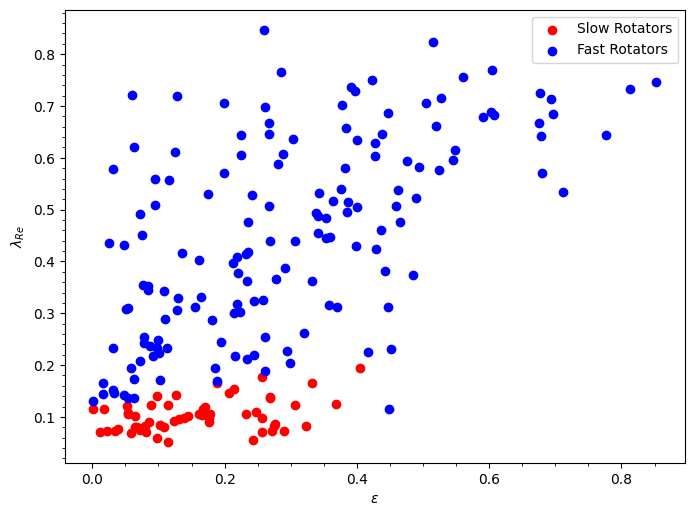

In [3]:
# plot spin vs ellipticity and draw in SR selection box
SR_spin = []
SR_ellip = []
FR_spin = []
FR_ellip = []

for i in range(len(centrals)):
    if np.log10(centrals['MassA'][i]) > 12.5:
        if centrals['ROTATOR_CAT_SEEING'][i] == 1:
            SR_spin.append(centrals['LAMBDAR_RE_SEEING'][i])
            SR_ellip.append(centrals['ELLIP'][i])
        elif centrals['ROTATOR_CAT_SEEING'][i] == 0:
            FR_spin.append(centrals['LAMBDAR_RE_SEEING'][i])
            FR_ellip.append(centrals['ELLIP'][i])

plt.figure(figsize=(8, 6), dpi=100)
SRspinellip = plt.scatter(SR_ellip,SR_spin,color='red')
FRspinellip = plt.scatter(FR_ellip,FR_spin,color='blue')
plt.legend(['Slow Rotators', 'Fast Rotators'])
plt.minorticks_on()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\lambda_{Re}$')

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/SRselection.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

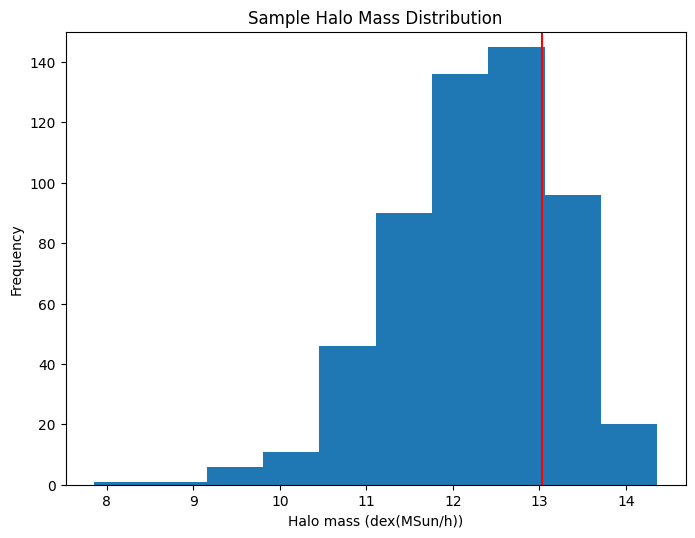

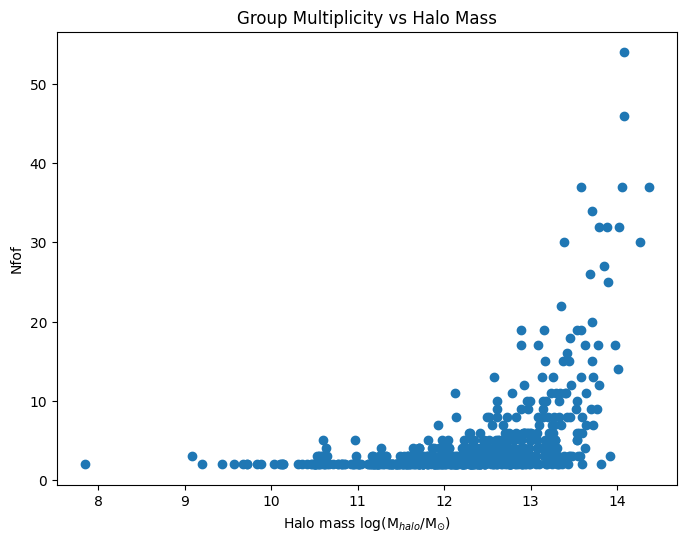

In [182]:
# # generate halo mass hist

# plt.figure(figsize=(8, 6), dpi=100)
# halomasshist = plt.hist(np.log10(centrals['MassA']))
# plt.plot([13.03,13.03], [0,150],color='red')
# plt.ylim([0,150])
# plt.title('Sample Halo Mass Distribution')
# plt.xlabel(r'Halo mass (dex(MSun/h))')
# plt.ylabel(r'Frequency')

# #save the plot
# filename = "/suphys/fscu5535/python_scripts/figures/halomassdist.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

# generate nFof hist
plt.figure(figsize=(8, 6), dpi=100)
nFof = plt.scatter(np.log10(centrals['MassA']),centrals['Nfof'])
plt.title('Group Multiplicity vs Halo Mass')
plt.xlabel(r'Halo mass log(M$_{halo}$/M$_{\odot}$)')
plt.ylabel(r'Nfof')

#save the plot
filename = "/suphys/fscu5535/python_scripts/figures/NfofHalomass.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)



In [160]:
count = 0

for i in range(len(centrals)):
    if np.log10(centrals['MassA'][i]) > 13.03:
        count += 1
        
print("total:",len(centrals))
print("above threshold:",count)
print("fraction:",count/len(centrals))
    
    

total: 552
above threshold: 0
fraction: 0.0


19 0.07916666666666666
66 0.275
155 0.6458333333333334


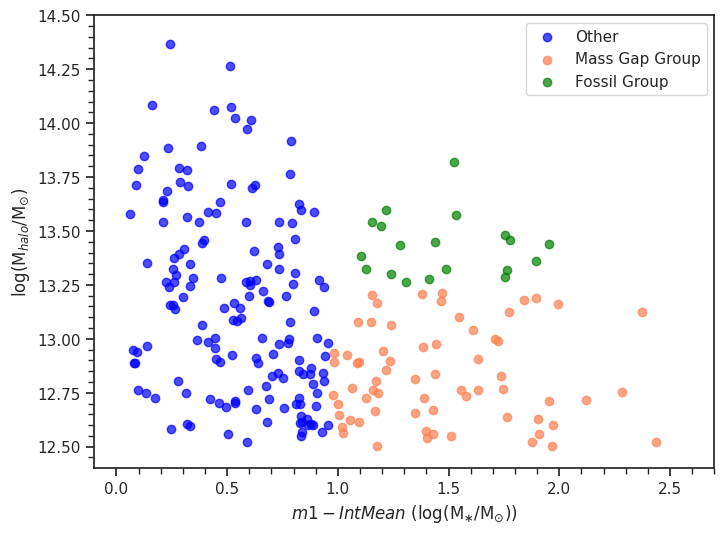

In [197]:
# halo mass vs mass gap

mggsgap = []
mggsmass = []
fossilsgap = []
fossilsmass = []
restgap = []
restmass = []

fossils = 0
mggs = 0
rest = 0

for i in range(len(centrals)):

    if np.log10(newcentrals['MassA'][i]) > 12.5:
        if newcentrals['m1-IntMean'][i] > 0.97:
            if  newcentrals['log(MassA)'][i] > 13.25:
                fossilsgap.append(newcentrals['m1-IntMean'][i])
                fossilsmass.append(np.log10(newcentrals['MassA'][i]))
                fossils += 1
            else:
                mggsgap.append(newcentrals['m1-IntMean'][i])
                mggsmass.append(np.log10(newcentrals['MassA'][i]))
                mggs += 1
        else:
            restgap.append(newcentrals['m1-IntMean'][i])
            restmass.append(np.log10(newcentrals['MassA'][i]))
            rest += 1
                             

plt.figure(figsize=(8, 6), dpi=100)
restscatter = plt.scatter(restgap,restmass,color='blue',marker=k,alpha=0.7)
mggsscatter = plt.scatter(mggsgap, mggsmass,color='coral',marker=k,alpha=0.7)
fossilsscatter = plt.scatter(fossilsgap,fossilsmass,color='green',marker=k,alpha=0.7)

# plt.plot([0.97,2.7],[13.03,13.03],color='red')
# plt.plot([0.97,0.97],[12.4,14.5],color='red')
plt.ylim([12.4,14.5])
plt.xlim([-0.1,2.7])
plt.ylabel(r'log(M$_{halo}$/M$_{\odot}$)')
plt.xlabel(r'$\it{m1-IntMean}$ (log(M$_{\ast}$/M$_{\odot}$))')
plt.minorticks_on()
plt.legend(['Other','Mass Gap Group','Fossil Group'])

print(fossils, fossils/(fossils+mggs+rest))
print(mggs, mggs/(fossils+mggs+rest))
print(rest, rest/(fossils+mggs+rest))

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/halomassgap.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [174]:
# fraction of groups with halo mass above threshold
count = 0
for i in range(len(centrals)):
    if np.log10(centrals['MassA'][i]) > 13.03:
        count += 1
        
print(count)
print(len(centrals))
print(count/len(centrals))
        

119
552
0.21557971014492755


In [186]:
# determine group_type for each group: fossil, massgap, other, bad
group_type = []

for i in range(len(centrals)):
    if centrals['log(MassA)'][i] < 12.5:
        group_type.append(str('lowmass'))
        
    elif centrals['m1-IntMean'][i] > 0.97:
        if centrals['log(MassA)'][i] > 13.25:
            group_type.append(str('fossil'))
        else:
            group_type.append(str('massgap'))
    else:
        group_type.append(str('other'))

centrals['group_type'] = group_type

centrals.info()

centrals.write('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits',overwrite=True) 

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [187]:
newcentrals = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits',memmap=True)

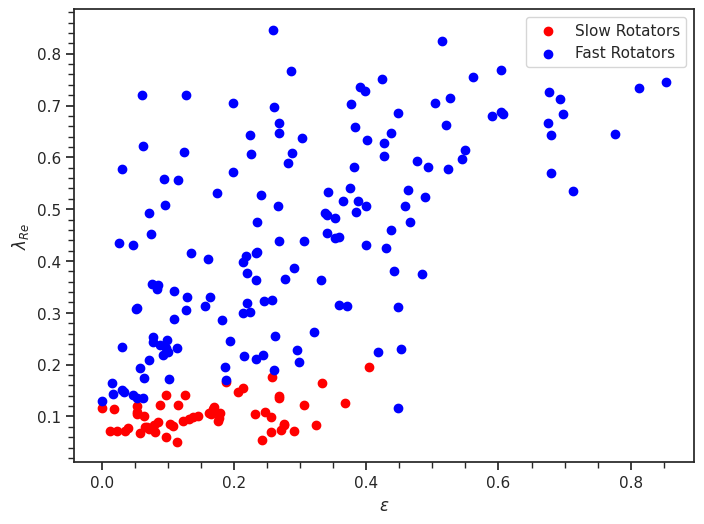

In [155]:
# plot spin vs ellipticity and draw in SR selection box
SR_spin = []
SR_ellip = []
FR_spin = []
FR_ellip = []

for i in range(len(centrals)):
    if np.log10(centrals['MassA'][i]) > 12.5:
        if centrals['ROTATOR_CAT_SEEING'][i] == 1:
            SR_spin.append(centrals['LAMBDAR_RE_SEEING'][i])
            SR_ellip.append(centrals['ELLIP'][i])
        elif centrals['ROTATOR_CAT_SEEING'][i] == 0:
            FR_spin.append(centrals['LAMBDAR_RE_SEEING'][i])
            FR_ellip.append(centrals['ELLIP'][i])

plt.figure(figsize=(8, 6), dpi=100)
SRspinellip = plt.scatter(SR_ellip,SR_spin,color='red')
FRspinellip = plt.scatter(FR_ellip,FR_spin,color='blue')
plt.legend(['Slow Rotators', 'Fast Rotators'])
plt.minorticks_on()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\lambda_{Re}$')

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/SRselection.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

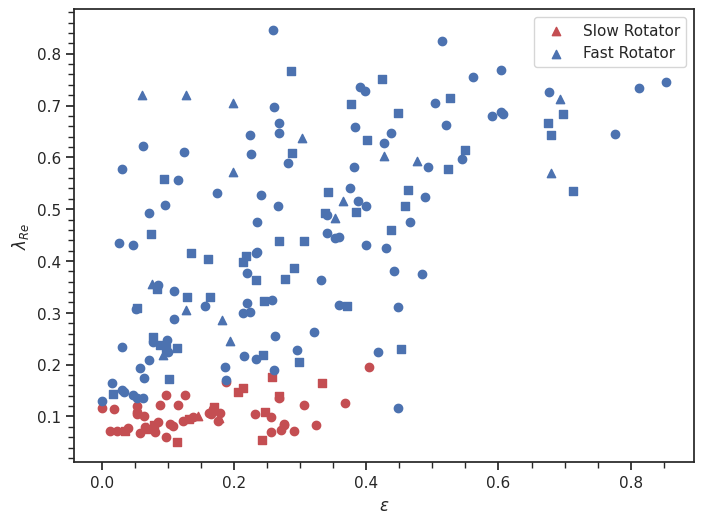

In [156]:
# plot spin vs ellipticity with SR/FR on color and FS/MGG/Other on marker shape

category = ['fossil','massgap','other']
marker = ['^','s','o']

plt.figure(figsize=(8,6),dpi=100)

for i,k in zip(category,marker):
    SR_spin = []
    SR_ellip = []
    FR_spin = []
    FR_ellip = []
    
    for j in range(len(newcentrals)):
        if newcentrals['group_type'][j] == i:
            if newcentrals['ROTATOR_CAT_SEEING'][j] == 1:
                SR_spin.append(newcentrals['LAMBDAR_RE_SEEING'][j])
                SR_ellip.append(newcentrals['ELLIP'][j])
            else:
                FR_spin.append(newcentrals['LAMBDAR_RE_SEEING'][j])
                FR_ellip.append(newcentrals['ELLIP'][j])
                
    plt.scatter(SR_ellip,SR_spin,color='r',marker=k)
    plt.scatter(FR_ellip,FR_spin,color='b',marker=k)
        
plt.legend(['Slow Rotator','Fast Rotator'])
plt.minorticks_on()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\lambda_{Re}$')

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/SRselectiondiffcategory.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

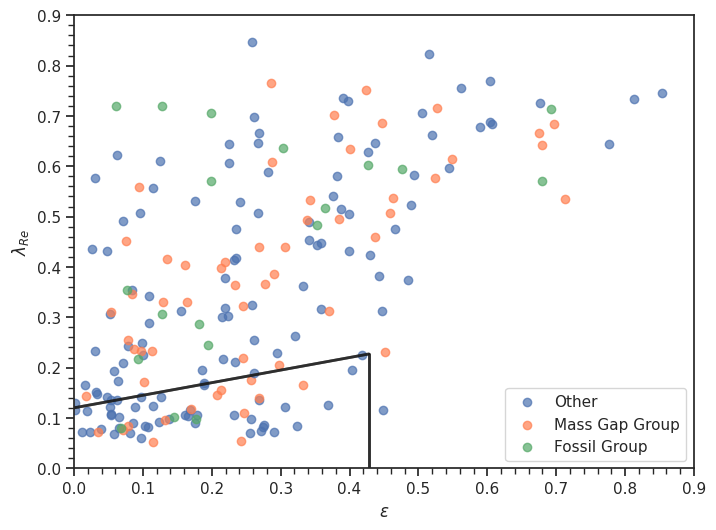

In [194]:
# opposite of above, SR/FR on marker shape, category (FS/MGG/Other) on colour

category = [1,0]
marker = ['o','o']

plt.figure(figsize=(8,6),dpi=100)

for i,k in zip(category,marker):
    FS_spin = []
    FS_ellip = []
    MGG_spin = []
    MGG_ellip = []
    Other_spin = []
    Other_ellip = []
    
    for j in range(len(newcentrals)):
        if newcentrals['ROTATOR_CAT_SEEING'][j] == i:
            if newcentrals['group_type'][j] == 'fossil':
                FS_spin.append(newcentrals['LAMBDAR_RE_SEEING'][j])
                FS_ellip.append(newcentrals['ELLIP'][j])
            elif newcentrals['group_type'][j] == 'massgap':
                MGG_spin.append(newcentrals['LAMBDAR_RE_SEEING'][j])
                MGG_ellip.append(newcentrals['ELLIP'][j])
            elif newcentrals['group_type'][j] == 'other':
                Other_spin.append(newcentrals['LAMBDAR_RE_SEEING'][j])
                Other_ellip.append(newcentrals['ELLIP'][j])
                
    plt.scatter(Other_ellip,Other_spin,color='b',marker=k,alpha=0.7)
    plt.scatter(MGG_ellip,MGG_spin,color='coral',marker=k,alpha=0.7)
    plt.scatter(FS_ellip,FS_spin,color='g',marker=k,alpha=0.7)
    plt.plot([0,0.428],[0.12,0.227],c='k',alpha=0.7,linewidth=2)
    plt.plot([0.428,0.428],[0,0.227],c='k',alpha=0.7,linewidth=2)
        
plt.legend(['Other','Mass Gap Group','Fossil Group'])
plt.minorticks_on()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\lambda_{Re}$')
plt.xlim(0,0.9)
plt.ylim(0,0.9)

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/SRselection.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [189]:
# extract groups with halo mas > 12.5
CATID = []
for i in range(len(newcentrals)):
    if newcentrals['log(MassA)'][i] > 12.5:
        CATID.append(newcentrals['m1_CATAID'][i])
        
catidtable = Table()
catidtable['m1_CATAID'] = CATID

combined = join(catidtable,newcentrals,keys='m1_CATAID',join_type='left')
    

In [35]:
centrals.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [55]:
CATIDs = []
for i in range(len(centrals)):
    if centrals['group_type'][i] != 'lowmass':
        CATIDs.append(centrals['m1_CATAID'][i])
        
gooddata = Table()
gooddata['m1_CATAID'] = CATIDs
gooddata = join(gooddata,centrals,keys='m1_CATAID',join_type='left')
gooddata['linage_LW_1Re'] = gooddata['linage_LW_1Re']/1e9
print(len(gooddata))

240


240
[<AxesSubplot:ylabel='log$(M_{halo}/M_{\\odot})$'> None None None None
 <AxesSubplot:xlabel='log$(M_{halo}/M_{\\odot})$', ylabel='$\\epsilon$'>
 <AxesSubplot:> None None None
 <AxesSubplot:xlabel='log$(M_{halo}/M_{\\odot})$', ylabel='$\\Delta_{m1IntMean}$ $($log$(M_{\\ast}/M_{\\odot}))$'>
 <AxesSubplot:xlabel='$\\epsilon$', ylabel='$\\Delta_{m1IntMean}$ $($log$(M_{\\ast}/M_{\\odot}))$'>
 <AxesSubplot:> None None
 <AxesSubplot:xlabel='log$(M_{halo}/M_{\\odot})$', ylabel='Age (Gyr)'>
 <AxesSubplot:xlabel='$\\epsilon$', ylabel='Age (Gyr)'>
 <AxesSubplot:xlabel='$\\Delta_{m1IntMean}$ $($log$(M_{\\ast}/M_{\\odot}))$', ylabel='Age (Gyr)'>
 <AxesSubplot:> None
 <AxesSubplot:xlabel='log$(M_{halo}/M_{\\odot})$', ylabel='$\\lambda_{Re}$'>
 <AxesSubplot:xlabel='$\\epsilon$', ylabel='$\\lambda_{Re}$'>
 <AxesSubplot:xlabel='$\\Delta_{m1IntMean}$ $($log$(M_{\\ast}/M_{\\odot}))$', ylabel='$\\lambda_{Re}$'>
 <AxesSubplot:xlabel='Age (Gyr)', ylabel='$\\lambda_{Re}$'>
 <AxesSubplot:xlabel='$\\lambda

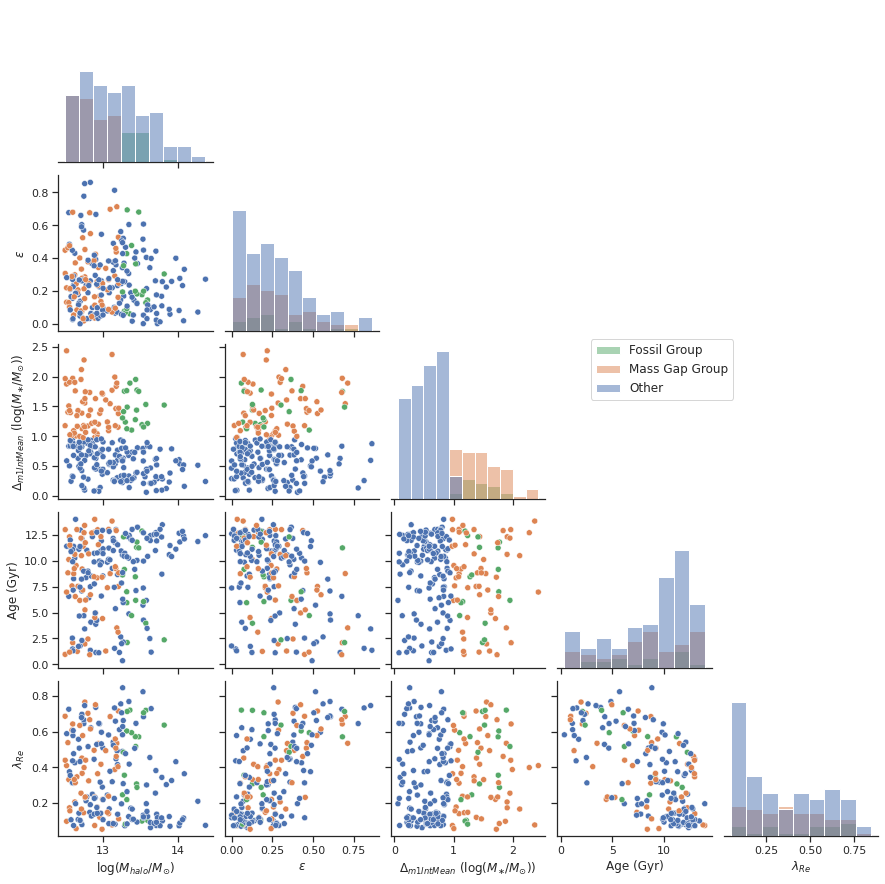

In [76]:
reldata = hstack([gooddata['log(MassA)'],gooddata['ELLIP'],gooddata['m1-IntMean'],gooddata['linage_LW_1Re'],gooddata['LAMBDAR_RE_SEEING'],gooddata['group_type']])
#print(len(reldata))

# rename labels to make plot look better
reldata.rename_column(r'm1-IntMean',r'$\Delta_{m1IntMean}$ $($log$(M_{\ast}/M_{\odot}))$')
reldata.rename_column(r'ELLIP','$\epsilon$')
reldata.rename_column(r'log(MassA)',r'log$(M_{halo}/M_{\odot})$')
reldata.rename_column(r'LAMBDAR_RE_SEEING','$\lambda_{Re}$')
reldata.rename_column(r'linage_LW_1Re','Age (Gyr)')
reldata.rename_column(r'group_type','Type')

for i in range(len(reldata)):
    if reldata['Type'][i] == 'fossil':
        reldata['Type'][i] = 'Fossil System'
    elif reldata['Type'][i] == 'massgap':
        reldata['Type'][i] = 'Mass Gap Group'
    elif reldata['Type'][i] == 'other':
        reldata['Type'][i] = 'Other'
        

        
data_pandas = reldata.to_pandas()
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_pandas, diag_kind="hist",corner = True,hue="Type")
g._legend.remove()
plt.legend(['Fossil Group','Mass Gap Group','Other'],loc = 'center',bbox_to_anchor=(-0.4,3),prop={'size':12})

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/pairplot2.0.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)



In [121]:
# extract groups with good rotator category
CATID = []
for i in range(len(gooddata)):
    if gooddata['ROTATOR_CAT_SEEING'][i] != -999:
        CATID.append(gooddata['m1_CATAID'][i])
        
catidtable = Table()
catidtable['m1_CATAID'] = CATID

gooddata2 = join(catidtable,gooddata,keys='m1_CATAID',join_type='left')

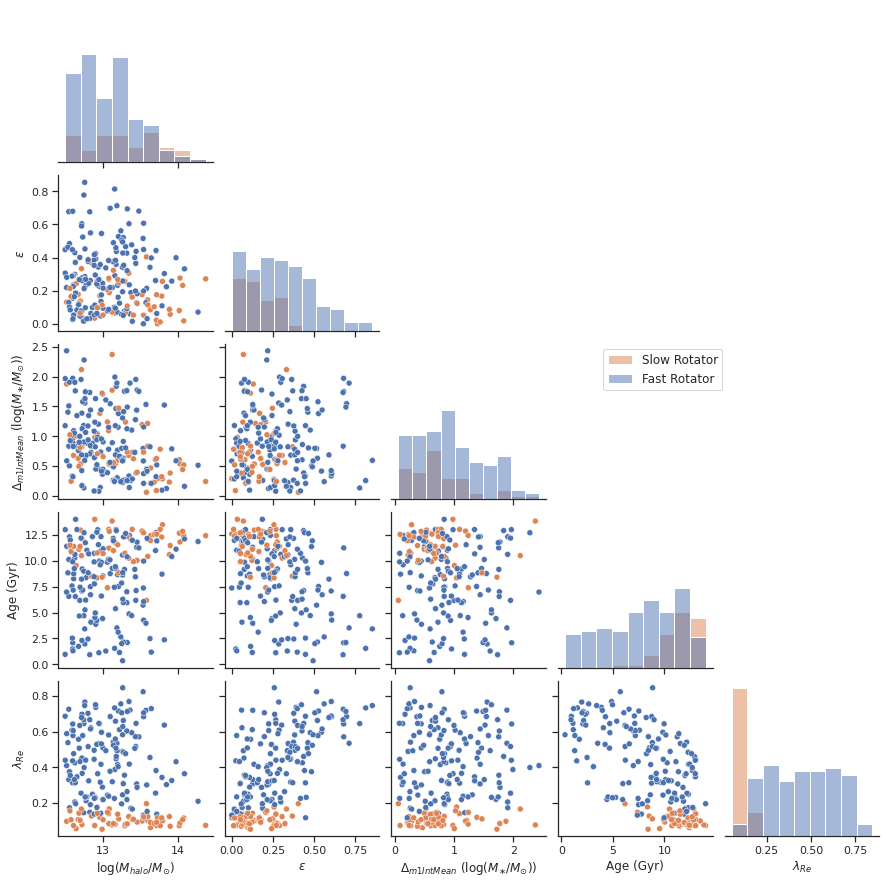

In [122]:
#reldata = hstack([combined2['log(MassA)'],combined2['ELLIP'],combined2['m1-IntMean'],combined2['LAMBDAR_RE_SEEING'],combined2['ROTATOR_CAT_SEEING']])
reldata = hstack([gooddata2['log(MassA)'],gooddata2['ELLIP'],gooddata2['m1-IntMean'],gooddata2['linage_LW_1Re'],gooddata2['LAMBDAR_RE_SEEING'],gooddata2['ROTATOR_CAT_SEEING']])

# rename labels to make plot look better
reldata.rename_column(r'm1-IntMean',r'$\Delta_{m1IntMean}$ $($log$(M_{\ast}/M_{\odot}))$')
reldata.rename_column(r'ELLIP','$\epsilon$')
reldata.rename_column(r'log(MassA)',r'log$(M_{halo}/M_{\odot})$')
reldata.rename_column(r'LAMBDAR_RE_SEEING','$\lambda_{Re}$')
reldata.rename_column(r'linage_LW_1Re','Age (Gyr)')
reldata.rename_column(r'ROTATOR_CAT_SEEING','Type')
# reldata.rename_column('m1',r'm1 (log(M$_{\ast}$/M$_{\odot}$))')
# for i in range(len(reldata)):
#     if reldata['Type'][i] == 'fossil':
#         reldata['Type'][i] = 'Fossil System'
#     elif reldata['Type'][i] == 'massgap':
#         reldata['Type'][i] = 'Mass Gap Group'
#     elif reldata['Type'][i] == 'other':
#         reldata['Type'][i] = 'Other'
        
data_pandas = reldata.to_pandas()
sns.set(style="ticks", color_codes=True)
#sns.set_palette('pastel')
g = sns.pairplot(data_pandas, diag_kind="hist",corner = True,hue="Type")
g._legend.remove()
plt.legend(['Slow Rotator', 'Fast Rotator'],loc = 'center',bbox_to_anchor=(-0.4,3),prop={'size':12})

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/pairplotROThue.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

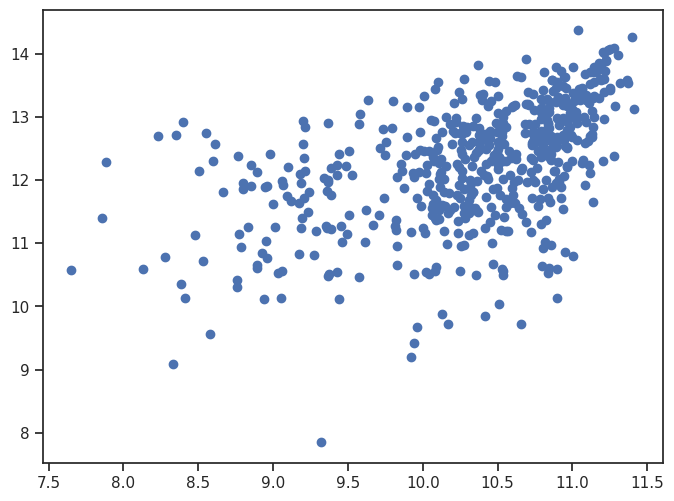

In [136]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(newcentrals['m1'],newcentrals['log(MassA)'])

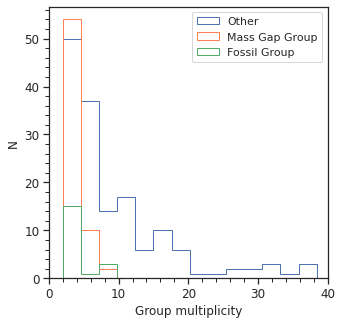

In [171]:
nfossil = []
nmgg = []
nother = []
for i in range(len(centrals)):
    if centrals['group_type'][i] != 'lowmass':
        
        if centrals['group_type'][i] == 'fossil':
            nfossil.append(centrals['Nfof'][i])
        
        elif centrals['group_type'][i] == 'massgap':
            nmgg.append(centrals['Nfof'][i])
        else:
            nother.append(centrals['Nfof'][i])
            
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
bins=np.histogram(np.hstack((nfossil,nmgg,nother)), bins=20)[1]
ax.hist(nother,bins,color='b',fill=False,histtype='step',label='Other')
ax.hist(nmgg,bins,color='coral',fill=False,histtype='step',label='Mass Gap Group')
ax.hist(nfossil,bins,color='g',fill=False,histtype='step',label='Fossil Group')
ax.minorticks_on()
ax.set_xlim(0,40)

ax.set_xlabel('Group multiplicity')
ax.set_ylabel('N')
ax.legend()

#save the plot
filename = "/suphys/fscu5535/python_scripts/figures/nfofhistgroupclass.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
        


In [191]:
count = 0
total = 0
countfossil = 0
for i in range(len(newcentrals)):
    if newcentrals['log(MassA)'][i] > 12.5:
        total += 1
        if newcentrals['ROTATOR_CAT_SEEING'][i] == 1 and newcentrals['group_type'][i] == 'fossil':
            count += 1
        
        if newcentrals['group_type'][i] == 'fossil':
            countfossil += 1
            
print(countfossil)
print(countfossil/total)
print(count)
print(count/total)
        


19
0.07916666666666666
3
0.0125


In [203]:
fossilfound = 0
mggfound = 0

for i in range(len(newcentrals)):
    if newcentrals['group_type'][i] == 'fossil' and fossilfound <= 5:
        print("fossilID:",newcentrals['m1_CATAID'][i])
        fossilfound += 1
    if newcentrals['group_type'][i] == 'massgap' and mggfound <= 5:
        print("MGGID:",newcentrals['m1_CATAID'][i])
        mggfound += 1
    

MGGID: 375560
MGGID: 323558
MGGID: 599838
fossilID: 601013
MGGID: 381979
MGGID: 383147
MGGID: 386673
fossilID: 323329
fossilID: 323504
fossilID: 325467
fossilID: 375610
fossilID: 376121


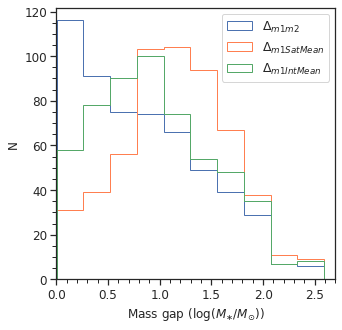

In [183]:
#mass gap methods
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
#bins=np.histogram(np.hstack((nfossil,nmgg,nother)), bins=15)[1]
ax.hist(centrals['m1-m2'],color='b',fill=False,histtype='step',label=r'$\Delta_{m1m2}$')
ax.hist(centrals['m1-SatMean'],color='coral',fill=False,histtype='step',label=r'$\Delta_{m1SatMean}$')
ax.hist(centrals['m1-IntMean'],color='g',fill=False,histtype='step',label=r'$\Delta_{m1IntMean}$')
ax.set_xlim(0,2.7)
plt.minorticks_on()

ax.set_xlabel(r'Mass gap (log$(M_{\ast}/M_{\odot})$)')
ax.set_ylabel('N')
ax.legend()

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/DifferentMassGapMethods.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [2]:
centrals = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits')
centrals.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64        MaskedColumn   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [22]:
mggLW = []
fgLW = []
otherLW = []
#lowmassLW = []

mggMW = []
fgMW = []
otherMW = []
#lowmassMW = []


for i in range(len(centrals)):
    if centrals['group_type'][i] == 'massgap':
        mggLW.append(centrals['logage_LW_1Re'][i])
        mggMW.append(centrals['logage_MW_1Re'][i])

    if centrals['group_type'][i] == 'fossil':
        fgLW.append(centrals['logage_LW_1Re'][i])
        fgMW.append(centrals['logage_MW_1Re'][i])
        
    if centrals['group_type'][i] == 'other':
        otherLW.append(centrals['logage_LW_1Re'][i])
        otherMW.append(centrals['logage_MW_1Re'][i])
        
    if centrals['group_type'][i] == 'lowmass':
        lowmassLW.append(centrals['logage_LW_1Re'][i])
        lowmassMW.append(centrals['logage_MW_1Re'][i])
        

print(len(mggLW))
print(len(fgLW))
print(len(otherLW))
print(len(lowmassLW))

66
19
155
312


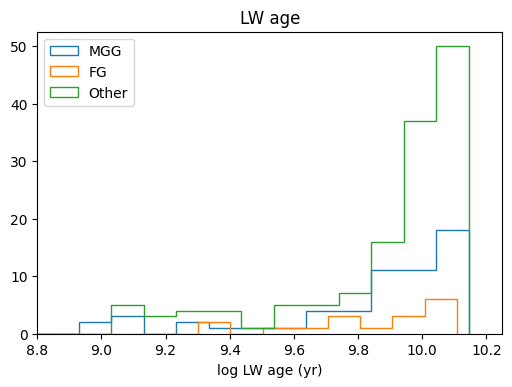

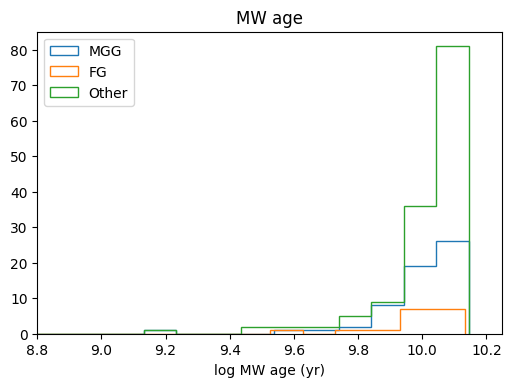

In [26]:
plt.figure(figsize=(6,4),dpi=100)
plt.hist(mggLW,bins=100,histtype='step',fill=False,label="MGG")
plt.hist(fgLW,bins=100,histtype='step',fill=False,label="FG")
plt.hist(otherLW,bins=100,histtype='step',fill=False,label="Other")
plt.xlim(8.8,10.25)
plt.xlabel("log LW age (yr)")
plt.legend(loc="upper left")
plt.title("LW age")

plt.figure(figsize=(6,4),dpi=100)
plt.hist(mggMW,bins=100,histtype='step',fill=False,label="MGG")
plt.hist(fgMW,bins=100,histtype='step',fill=False,label="FG")
plt.hist(otherMW,bins=100,histtype='step',fill=False,label="Other")
plt.xlabel("log MW age (yr)")
plt.xlim(8.8,10.25)
plt.legend()
plt.title("MW age")
plt.legend(loc="upper left")

In [33]:
# ks tests
#LW AGE
MGG_OTHERLW = stats.kstest(mggLW,otherLW)
print("MGG_OTHER, LW AGE:",MGG_OTHERLW)

FG_OTHERLW = stats.kstest(fgLW,otherLW)
print("FG_OTHER, LW AGE:",FG_OTHERLW)


#MW AGE
MGG_OTHERMW = stats.kstest(mggMW,otherMW)
print("MGG_OTHER, MW AGE:",MGG_OTHERMW)

FG_OTHERMW = stats.kstest(fgMW,otherMW)
print("FG_OTHER, MW AGE:",FG_OTHERMW)

MGG_OTHER, LW AGE: KstestResult(statistic=0.17771260997067448, pvalue=0.09274536522143106)
FG_OTHER, LW AGE: KstestResult(statistic=0.22410865874363328, pvalue=0.3111303676538542)
MGG_OTHER, MW AGE: KstestResult(statistic=0.16392961876832846, pvalue=0.14546300862084605)
FG_OTHER, MW AGE: KstestResult(statistic=0.26179966044142616, pvalue=0.16187415336743072)


In [2]:
centrals = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits',memmap=True)

In [3]:
centrals.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [17]:
halomass = []
massgap = []
cataid = []
group_id = []
nfof = []

for i in range(len(centrals)):
    if centrals['group_type'][i] == 'fossil':
        halomass.append(centrals['log(MassA)'][i])
        massgap.append(centrals['m1-IntMean'][i])
        cataid.append(centrals['m1_CATAID'][i])
        group_id.append(centrals['GroupID'][i])
        nfof.append(centrals['Nfof'][i])
        
print(len(massgap))

19


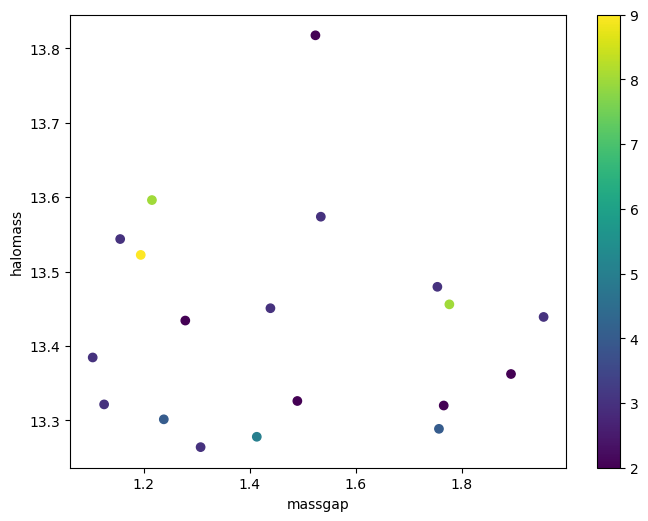

In [20]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(massgap,halomass,c=nfof)
plt.xlabel("massgap")
plt.ylabel("halomass")
cb=plt.colorbar()



In [10]:
print(np.argmax(massgap))
print(np.argmax(halomass))

14
18


In [16]:
print(cataid[18])

486957


In [19]:
print(nfof)

[5, 3, 3, 3, 3, 2, 9, 8, 8, 3, 3, 2, 4, 4, 3, 3, 2, 2, 2]


In [28]:
print(massgap[-6])
print(halomass[-6])
print(cataid[-6])

1.2381544
13.301347052102884
238458


In [87]:
fg = 0
fgsr = 0
fgfr = 0
mg = 0
mgsr = 0
mgfr = 0
oth = 0
othsr = 0
othfr = 0

low = 0

for i in range(len(centrals)):
    
    if centrals['group_type'][i] == 'other':
        oth += 1
        if centrals['ROTATOR_CAT_SEEING'][i] == 0:
            othfr += 1
        if centrals['ROTATOR_CAT_SEEING'][i] == 1:
            othsr += 1
            
    if centrals['group_type'][i] == 'massgap':
        mg += 1
        
        if centrals['ROTATOR_CAT_SEEING'][i] == 0:
            mgfr += 1
        if centrals['ROTATOR_CAT_SEEING'][i] == 1:
            mgsr += 1
            
    if centrals['group_type'][i] == 'fossil':
        fg += 1
        
        if centrals['ROTATOR_CAT_SEEING'][i] == 0:
            fgfr += 1
        if centrals['ROTATOR_CAT_SEEING'][i] == 1:
            fgsr += 1
            
    if centrals['group_type'][i] == 'lowmass':
        low += 1
        
print("fossils:",fg,fg/(fg+mg+oth),"SR:",fgsr,"FR:",fgfr)
print("massgap:",mg,mg/(fg+mg+oth),"SR:",mgsr,"FR:",mgfr)
print("other:",oth,oth/(fg+mg+oth),"SR:",othsr,"FR:",othfr)
print("low",low)
print(fg+mg+oth)

print(fgsr+mgsr+othsr)
print(fgfr+mgfr+othfr)

    

fossils: 19 0.07916666666666666 SR: 3 FR: 16
massgap: 66 0.275 SR: 13 FR: 45
other: 155 0.6458333333333334 SR: 40 FR: 91
low 312
240
56
152


In [88]:
19+58+131

208

In [29]:
print(centrals['group_type'][50:60])

group_type
----------
   massgap
   massgap
   lowmass
   lowmass
   lowmass
   massgap
   lowmass
   lowmass
   lowmass
   lowmass


In [84]:
srcount = 0
for i in range(len(centrals)):
    if centrals['group_type'][i] != "lowmass" and centrals['ROTATOR_CAT_SEEING'][i] == 0:
        srcount += 1
        
print(srcount)

152


In [85]:
152+56

208